#  Exploratory Data Analysis

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

from PIL import Image
import numpy as np
import random

## Load Metadata

In [17]:
csv_path = "../data/Data_Entry_2017_v2020.csv"
df = pd.read_csv(csv_path)
df.head()

,Image Index,Finding Labels,Follow-up #,Patient ID,Patient Age,Patient Gender,View Position,OriginalImage[Width,Height],OriginalImagePixelSpacing[x,y]
0,00000001_000.png,Cardiomegaly,0,1,57,M,PA,2682,2749,0.143,0.143
1,00000001_001.png,Cardiomegaly|Emphysema,1,1,58,M,PA,2894,2729,0.143,0.143
2,00000001_002.png,Cardiomegaly|Effusion,2,1,58,M,PA,2500,2048,0.168,0.168
3,00000002_000.png,No Finding,0,2,80,M,PA,2500,2048,0.171,0.171
4,00000003_001.png,Hernia,0,3,74,F,PA,2500,2048,0.168,0.168


In [18]:
print("Total images:", len(df))
print("\nUnique patients:", df['Patient ID'].nunique())
df.info()

Total images: 112120

Unique patients: 30805
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112120 entries, 0 to 112119
Data columns (total 11 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Image Index                  112120 non-null  object 
 1   Finding Labels               112120 non-null  object 
 2   Follow-up #                  112120 non-null  int64  
 3   Patient ID                   112120 non-null  int64  
 4   Patient Age                  112120 non-null  int64  
 5   Patient Gender               112120 non-null  object 
 6   View Position                112120 non-null  object 
 7   OriginalImage[Width          112120 non-null  int64  
 8   Height]                      112120 non-null  int64  
 9   OriginalImagePixelSpacing[x  112120 non-null  float64
 10  y]                           112120 non-null  float64
dtypes: float64(2), int64(5), object(4)
memory usage: 9.4+ MB


##  Process Labels

Total unique diseases: 15
['Atelectasis', 'Cardiomegaly', 'Consolidation', 'Edema', 'Effusion', 'Emphysema', 'Fibrosis', 'Hernia', 'Infiltration', 'Mass', 'No Finding', 'Nodule', 'Pleural_Thickening', 'Pneumonia', 'Pneumothorax']


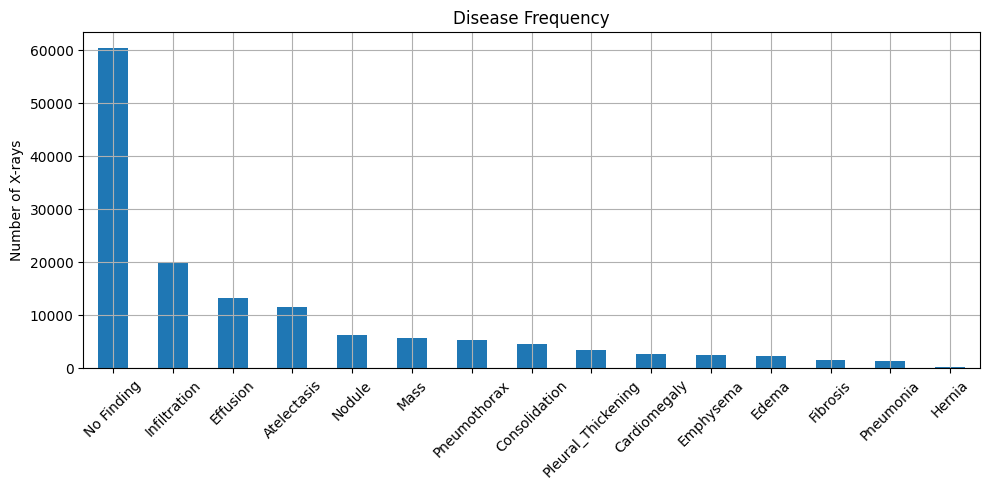

In [19]:
# Create list of all unique pathologies
all_labels = df["Finding Labels"].apply(lambda x: x.split('|'))
flat_labels = [label for sublist in all_labels for label in sublist]
unique_labels = sorted(set(flat_labels))
print("Total unique diseases:", len(unique_labels))
print(unique_labels)

# Multi-hot encode labels
for label in unique_labels:
    df[label] = df['Finding Labels'].apply(lambda x: 1 if label in x else 0)

df[unique_labels].sum().sort_values(ascending=False).plot(kind='bar', figsize=(10,5))
plt.title("Disease Frequency")
plt.ylabel("Number of X-rays")
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

## Image Properties (Size, Mode, Examples)

In [3]:
# Random sample of images
image_folder = "../data/images"  # update to your path
sample_files = random.sample(os.listdir(image_folder), 5)

for file in sample_files:
    img_path = os.path.join(image_folder, file)
    img = Image.open(img_path)
    print(f"{file} - size: {img.size}, mode: {img.mode}")
    plt.imshow(img, cmap='gray')
    plt.title(file)
    plt.axis('off')
    plt.show()


FileNotFoundError: [Errno 2] No such file or directory: '../data/images'

## Label Co-occurrence (Heatmap)

In [ ]:
plt.figure(figsize=(10, 8))
corr = df[unique_labels].corr()
sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)
plt.title("Label Co-occurrence")
plt.tight_layout()
plt.show()

## Check for class imbalance

In [ ]:
df['Pathology Count'] = df[unique_labels].sum(axis=1)
sns.countplot(x='Pathology Count', data=df)
plt.title("Number of Labels per Image")
plt.grid(True)
plt.show()